## Install Packages

In [1]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Load Packages

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
import numpy as np

## Load Data

In [32]:
df = pd.read_csv("/content/taxonomic_profiles.tsv", sep="\t")

## Pre-Process

### Set 'Taxonomy' Column as Index

In [33]:
df = df.set_index("taxonomy")

### Transpose

In [34]:
df = df.transpose()

In [35]:
# Drop the first row (OTU ID)
df.drop(df.index[0], inplace=True)

In [36]:
df.head()

taxonomy,Bacteria; __Proteobacteria; __Alphaproteobacteria; __Rhodospirillales; __Acetobacteraceae; __Belnapia,Bacteria; __Proteobacteria; __Betaproteobacteria; __Burkholderiales; __Comamonadaceae; __Tepidimonas,Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Christensenellaceae; __Christensenellaceae_R_7_group,Bacteria; __Bacteroidetes; __Bacteroidia; __Bacteroidales; __Prevotellaceae; __Prevotella,Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Family_XIII; __Family_XIII_AD3011_group,Bacteria; __Proteobacteria; __Alphaproteobacteria; __Rhodobacterales; __Rhodobacteraceae; __Paracoccus,Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Ruminococcaceae; __Ruminiclostridium,Bacteria; __Proteobacteria; __Gammaproteobacteria; __Run_SP154; __f; __g,Bacteria; __Proteobacteria; __Gammaproteobacteria; __Pasteurellales; __Pasteurellaceae; __Frederiksenia,Bacteria; __Actinobacteria; __Actinobacteria; __Corynebacteriales; __Corynebacteriaceae; __Corynebacterium_1,...,Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Clostridiales_vadinBB60_group; __g,Bacteria; __Bacteroidetes; __Bacteroidia; __Bacteroidales; __Prevotellaceae; __Prevotella,Bacteria; __Tenericutes; __Mollicutes; __Mollicutes_RF9; __f; __g,Bacteria; __Proteobacteria; __Alphaproteobacteria; __Rhodospirillales; __Rhodospirillales_Incertae_Sedis; __Candidatus_Alysiosphaera,Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Ruminococcaceae; __Ruminococcus_1,Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Lachnospiraceae; __Blautia,Bacteria; __Bacteroidetes; __Sphingobacteriia; __Sphingobacteriales; __Saprospiraceae; __uncultured,Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Lachnospiraceae; __Roseburia,Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Lachnospiraceae; __uncultured,Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Ruminococcaceae; __Ruminococcaceae_UCG_014
206646,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,481.0,0.0,0.0,0.0,0.0
224324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0
206619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
224326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
206624,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Relative Abundance Normalization

In [37]:
def normalize(row):
    total = row.sum()
    return row / total

df = df.apply(normalize, axis=1)

In [38]:
df.head()

taxonomy,Bacteria; __Proteobacteria; __Alphaproteobacteria; __Rhodospirillales; __Acetobacteraceae; __Belnapia,Bacteria; __Proteobacteria; __Betaproteobacteria; __Burkholderiales; __Comamonadaceae; __Tepidimonas,Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Christensenellaceae; __Christensenellaceae_R_7_group,Bacteria; __Bacteroidetes; __Bacteroidia; __Bacteroidales; __Prevotellaceae; __Prevotella,Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Family_XIII; __Family_XIII_AD3011_group,Bacteria; __Proteobacteria; __Alphaproteobacteria; __Rhodobacterales; __Rhodobacteraceae; __Paracoccus,Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Ruminococcaceae; __Ruminiclostridium,Bacteria; __Proteobacteria; __Gammaproteobacteria; __Run_SP154; __f; __g,Bacteria; __Proteobacteria; __Gammaproteobacteria; __Pasteurellales; __Pasteurellaceae; __Frederiksenia,Bacteria; __Actinobacteria; __Actinobacteria; __Corynebacteriales; __Corynebacteriaceae; __Corynebacterium_1,...,Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Clostridiales_vadinBB60_group; __g,Bacteria; __Bacteroidetes; __Bacteroidia; __Bacteroidales; __Prevotellaceae; __Prevotella,Bacteria; __Tenericutes; __Mollicutes; __Mollicutes_RF9; __f; __g,Bacteria; __Proteobacteria; __Alphaproteobacteria; __Rhodospirillales; __Rhodospirillales_Incertae_Sedis; __Candidatus_Alysiosphaera,Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Ruminococcaceae; __Ruminococcus_1,Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Lachnospiraceae; __Blautia,Bacteria; __Bacteroidetes; __Sphingobacteriia; __Sphingobacteriales; __Saprospiraceae; __uncultured,Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Lachnospiraceae; __Roseburia,Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Lachnospiraceae; __uncultured,Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Ruminococcaceae; __Ruminococcaceae_UCG_014
206646,0.000000,0.0,0.0,0.0,0.000042,0.0,0.000085,0.0,0.0,0.000339,...,0.0,0.0,0.0,0.0,0.0,0.020375,0.0,0.0,0.0,0.0
224324,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000689,0.0,0.0,0.0,0.0
206619,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.001242,0.0,0.0,0.0,0.0
224326,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.003918,0.0,0.0,0.0,0.0
206624,0.023743,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


### Keep One Duplicate Column Only

In [39]:
if df.columns.duplicated().any():
    print("There are duplicate column names in the dataframe")
else:
    print("There are no duplicate column names in the dataframe")

There are duplicate column names in the dataframe


In [40]:
df = df.loc[:, ~df.columns.duplicated()]

## Save Pre-Processed to CSV

In [69]:
#df.to_csv('/content/pre_processed_data.csv', index=False)

In [20]:
#df = pd.read_csv("/content/pre_processed_data.csv")

In [41]:
if df.columns.duplicated().any():
    print("There are duplicate column names in the dataframe")
else:
    print("There are no duplicate column names in the dataframe")

There are no duplicate column names in the dataframe


In [43]:
print(df.shape)

(178, 476)


## K-Means Clustering

### Determine the Optimal Number of Clusters

#### Elbow Plot

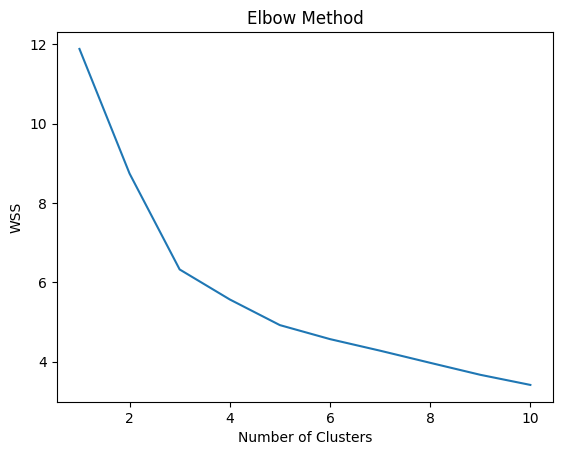

In [44]:
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wss.append(kmeans.inertia_)
plt.plot(range(1, 11), wss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.show()

In [45]:
kl = KneeLocator(range(1, 11), wss, curve="convex", direction="decreasing")
kl.elbow

3

#### Silhouette Coefficient

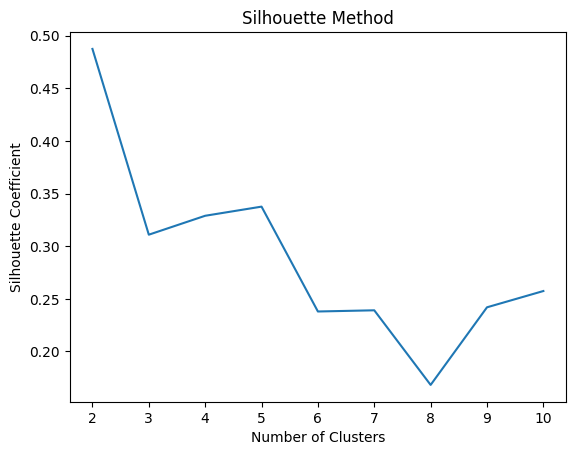

In [29]:
silhouette_coefficients = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)
plt.plot(range(2, 11), silhouette_coefficients)
plt.title('Silhouette Method')
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Choose k = 3

### K-Means Modeling

In [46]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [47]:
labels = kmeans.labels_
df['cluster'] = labels


### Feature Importances

In [48]:
feature_names = df.drop(columns=['cluster']).columns 

centroids = kmeans.cluster_centers_
differences = []
for i in range(num_clusters):
    for j in range(i+1, num_clusters):
        diff = np.abs(centroids[i] - centroids[j])
        differences.append(diff)
differences = np.array(differences)
feature_importance = pd.DataFrame(differences.sum(axis=0), columns=['importance'], index=feature_names)
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
feature_importance = feature_importance.loc[~feature_importance.index.duplicated(keep='first')]
print(feature_importance)

                                                    importance
taxonomy                                                      
Bacteria; __Proteobacteria; __Gammaproteobacter...    1.031693
Bacteria; __Bacteroidetes; __Bacteroidia; __Bac...    0.591894
Bacteria; __Firmicutes; __Clostridia; __Clostri...    0.096494
Bacteria; __Proteobacteria; __Betaproteobacteri...    0.059451
Bacteria; __Firmicutes; __Clostridia; __Clostri...    0.041921
...                                                        ...
Bacteria; __Nitrospirae; __Nitrospira; __Nitros...    0.000000
Bacteria; __Bacteroidetes; __Cytophagia; __Cyto...    0.000000
Bacteria; __Actinobacteria; __Actinobacteria; _...    0.000000
Bacteria; __Actinobacteria; __Actinobacteria; _...    0.000000
Bacteria; __Cyanobacteria; __ML635J_21; __o; __...    0.000000

[476 rows x 1 columns]


In [49]:
print(feature_importance.index)

Index(['Bacteria; __Proteobacteria; __Gammaproteobacteria; __Enterobacteriales; __Enterobacteriaceae; __Escherichia_Shigella',
       'Bacteria; __Bacteroidetes; __Bacteroidia; __Bacteroidales; __Bacteroidaceae; __Bacteroides',
       'Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Lachnospiraceae; ___Eubacterium_rectale_group',
       'Bacteria; __Proteobacteria; __Betaproteobacteria; __Burkholderiales; __Oxalobacteraceae; __Massilia',
       'Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Lachnospiraceae; __Anaerostipes',
       'Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Lachnospiraceae; __Roseburia',
       'Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Lachnospiraceae; __Epulopiscium',
       'Bacteria; __Proteobacteria; __Gammaproteobacteria; __Enterobacteriales; __Enterobacteriaceae; __Citrobacter',
       'Bacteria; __Bacteroidetes; __Bacteroidia; __Bacteroidales; __Porphyromonadaceae; __Parabacteroides',
       'Bacteria; __Firmicut

## Visualization

### Box Plots

#### Escherichia_Shigella

Text(0.5, 1.0, 'Distribution of Escherichia_Shigella by Cluster')

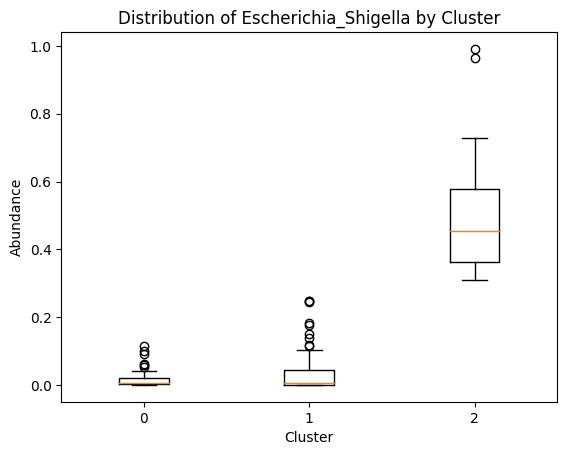

In [50]:
cluster_groups = df.groupby('cluster')
feature_data = [cluster_groups.get_group(cluster_label)['Bacteria; __Proteobacteria; __Gammaproteobacteria; __Enterobacteriales; __Enterobacteriaceae; __Escherichia_Shigella'].values for cluster_label in cluster_groups.groups]
fig, ax = plt.subplots()
ax.boxplot(feature_data)
ax.set_xticklabels(cluster_groups.groups.keys())
ax.set_ylabel('Abundance')
ax.set_xlabel('Cluster')
ax.set_title('Distribution of Escherichia_Shigella by Cluster')

#### Bacteroides

Text(0.5, 1.0, 'Distribution of Bacteroides by Cluster')

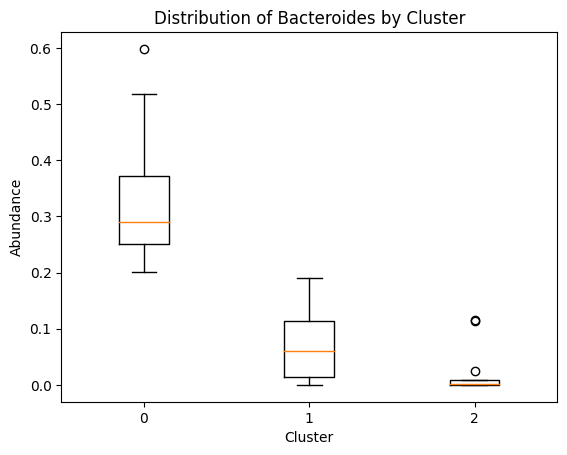

In [51]:
cluster_groups = df.groupby('cluster')
feature_data = [cluster_groups.get_group(cluster_label)['Bacteria; __Bacteroidetes; __Bacteroidia; __Bacteroidales; __Bacteroidaceae; __Bacteroides'].values for cluster_label in cluster_groups.groups]
fig, ax = plt.subplots()
ax.boxplot(feature_data)
ax.set_xticklabels(cluster_groups.groups.keys())
ax.set_ylabel('Abundance')
ax.set_xlabel('Cluster')
ax.set_title('Distribution of Bacteroides by Cluster')

#### Eubacterium_rectale_group

Text(0.5, 1.0, 'Distribution of Eubacterium_rectale_group by Cluster')

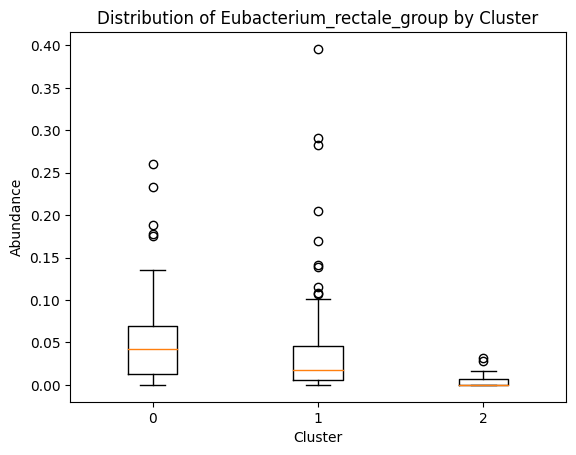

In [52]:
# Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Lachnospiraceae; ___Eubacterium_rectale_group
cluster_groups = df.groupby('cluster')
feature_data = [cluster_groups.get_group(cluster_label)['Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Lachnospiraceae; ___Eubacterium_rectale_group'].values for cluster_label in cluster_groups.groups]
fig, ax = plt.subplots()
ax.boxplot(feature_data)
ax.set_xticklabels(cluster_groups.groups.keys())
ax.set_ylabel('Abundance')
ax.set_xlabel('Cluster')
ax.set_title('Distribution of Eubacterium_rectale_group by Cluster')

#### Oxalobacteraceae; __Massilia

Text(0.5, 1.0, 'Distribution of Oxalobacteraceae; __Massilia by Cluster')

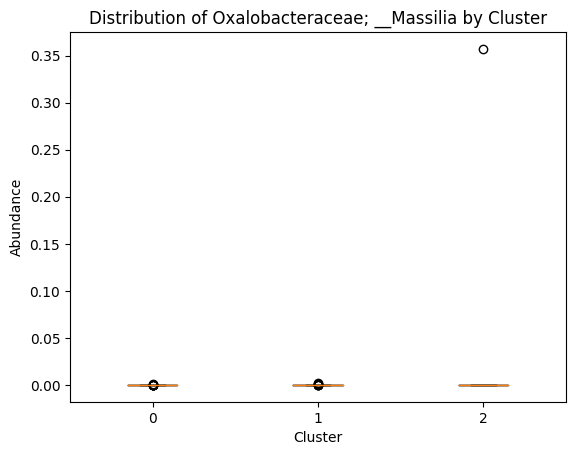

In [53]:
# Bacteria; __Proteobacteria; __Betaproteobacteria; __Burkholderiales; __Oxalobacteraceae; __Massilia
cluster_groups = df.groupby('cluster')
feature_data = [cluster_groups.get_group(cluster_label)['Bacteria; __Proteobacteria; __Betaproteobacteria; __Burkholderiales; __Oxalobacteraceae; __Massilia'].values for cluster_label in cluster_groups.groups]
fig, ax = plt.subplots()
ax.boxplot(feature_data)
ax.set_xticklabels(cluster_groups.groups.keys())
ax.set_ylabel('Abundance')
ax.set_xlabel('Cluster')
ax.set_title('Distribution of Oxalobacteraceae; __Massilia by Cluster')